## Part I: Introduction and Overview

The movie industry is a complex and competitive field, and predicting the success of an upcoming movie is a challenging task. However, with the advancements in data science and machine learning, it is now possible to use data to build models that can accurately predict the commercial success of a movie. In this project, we will leverage the IMDb database to build an algorithm that can predict whether an upcoming movie will be commercially successful or not.

To build our algorithm, we will first collect and clean the data using SQL and Python. We will then perform exploratory data analysis to identify the features that are most strongly correlated with commercial success. These features could include the genre, production year, length, production budget, and marketing spend. We will then use machine learning algorithms such as logistic regression, decision trees, and random forests to build our prediction model.

The ultimate goal of this project is to build an accurate and reliable prediction model that can be used by production companies, investors, and other stakeholders to make informed decisions about which movies to invest in. By accurately predicting the commercial success of upcoming movies, we can reduce the risk associated with movie production and distribution, and increase the chances of producing movies that will resonate with audiences and generate substantial profits.

Here is the link to our github repository: https://github.com/ZheShen00/PIC16B-23W-project-group6

#### Our Process

Collecting Data --> Cleaning and Making Database --> Modeling --> Making Predctions --> Conclusion


In [1]:
# These are all libraries we will use in this project
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import myProject module which includes the data visualization functions
# and the definition of the neural networks
import myProject

## Part II: Data Collection and Cleaning

There is a very famous saying that is repeated by data scientists: "Garbage in, garbage out.". So the process of data collection and cleaning will be one of the most important parts of our work.We will do the following in this section：

* We will collect the data from [IMDb](https://www.imdb.com/interfaces/) by `Scrapy`: **imdb.csv** and receive:

     1. **name.basics.tsv**: contains info about people, including names, professions, etc.
    
     2. **title.akas.tsv**: contains the titles of movies in different languages
    
     3. **title.basics.tsv**: contains info about all movies, tv shows
    
     4. **title.crew.tsv**: contains info about the crew
    
     5. **title.episode.tsv**: contains info about the episode of the tv shows
    
     6. **Title.principals.tsv (2.4GB)**: contains info about the principal cast of the movies
    
     7. **title.ratings.tsv**: contains ratings of all movies, tv shows

* Data Cleaning: We processed the data for preventing pollution on test data.

    Especially **name.basics.tsv**, **title.basics.tsv**, **Title.principals.tsv (2.4GB)**, **title.ratings.tsv**.

#### First for the title.basics.tsv: 

We filtered the basics data

`basics = basics.drop(['endYear', 'originalTitle'], axis=1) # drop unnecessary column 'endYear'
basics = basics[basics['titleType'] == 'movie'] # we only look for movies
basics = basics.drop(['titleType'], axis=1) # now, we can drop the titletype
basics = basics[basics['startYear'] != '\\N'] # drop the movies that don't have a year on file
basics = basics.astype({'startYear':'int'}) # convert the year to int
basics = basics[basics['startYear'] >= 2013] # produced in the past 10 years`

#### Next for the title.ratings.tsv:

we can now get the indexes of the movies and will use them to filter the following datasets

`movie = pd.unique(basics['tconst'])`

Then we get our movies ratings columns that we need

`rating=pd.read_csv('dataset/title.ratings.tsv',sep='\t')
 rating = rating[rating['tconst'].isin(movie)]`

#### Then for the title.principals.tsv:

`
principals = principals[principals['tconst'].isin(movie)]
principals = principals[principals['category'].isin(['actor', 'actress', 'director'])]
people = pd.unique(principals['nconst']) # find the people in the movies`

This code filters a pandas DataFrame called "principals" to find the unique IDs of actors, actresses, and directors who worked on a list of movies called "movie".

#### Finally the name.basics.tsv

`name = name[['nconst','primaryName']]
name = name[name['nconst'].isin(people)] # only need the people in the movies`

 * Creating Database and  merge the data

     We created a IMDb database which includes four pandas dataframes named **name, basics, ratings, principals**.
     After putting all the data into a database, it allow us to query and sort data more efficiently.
        
     The `principals` table is joined with the `ratings`, `basics`, and `name` tables based on matching values in their respective columns named `tconst` and `nconst`. The Query function is merging information about people who worked on the same movie or TV show from four different tables into a single table that contains information about the movie or TV show itself, the people involved in making it, and their ratings.
     
     After Dropping Duplicated columns in the merged dataframe, we obtain the final IMDb dataset. Which containing **404,315** rows and **12** columns.

## Part III:Exploratory Analysis and Visualization
In this section we will analyze the cleaned data. The goal is to identify the features that are most relevant for movie ratings. In this process we will use some visualizations to help the analysis.

### Part III (1):Checking the dataframe and choosing factors
First, we import the cleaned dataset. The whole dataset has 12 factors as well as over 400,000 movie data.

In [2]:
imdb = pd.read_csv('imdb.csv')
imdb

,Unnamed: 0,tconst,nconst,category,averageRating,numVotes,primaryTitle,isAdult,startYear,runtimeMinutes,genres,primaryName
0,92759,tt0013274,nm0412842,director,6.7,48,Istoriya grazhdanskoy voyny,0,2021,133,Documentary,Nikolai Izvolov
1,92760,tt0013274,nm0895048,director,6.7,48,Istoriya grazhdanskoy voyny,0,2021,133,Documentary,Dziga Vertov
2,522892,tt0062336,nm0815612,actor,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,Rubén Sotoconil
3,522893,tt0062336,nm1860495,actress,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,Claudia Paz
4,522894,tt0062336,nm0016013,actor,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,Luis Alarcón
...,...,...,...,...,...,...,...,...,...,...,...,...
404310,54610727,tt9916730,nm6096005,actor,8.3,10,6 Gunn,0,2017,116,\N,Devadhar Archit
404311,54610728,tt9916730,nm0059461,actor,8.3,10,6 Gunn,0,2017,116,\N,Sunil Barve
404312,54610729,tt9916730,nm13233318,actor,8.3,10,6 Gunn,0,2017,116,\N,Ganesh Vasant Patil
404313,54610730,tt9916730,nm4852679,actor,8.3,10,6 Gunn,0,2017,116,\N,Bhushan Pradhan


In our project, ratings are the most important indicator of a film's popularity. So we can start by looking at the specific data of the ratings.

In [3]:
imdb.averageRating.describe()

count    404315.000000
mean          6.057180
std           1.522904
min           1.000000
25%           5.100000
50%           6.200000
75%           7.100000
max          10.000000
Name: averageRating, dtype: float64

In our data set, we can see that the average rating is around 6.0 and the median is 6.2. And most scores are between 5.1 and 7.1. This will affect our next specific rating of the movie's popularity. For now, we will make the following scale of popularity: 
- Very Positive(>7.1)
- Mostly Positive(6.0-7.1)
- Mostly nagative(5.1-6.0)
- Very Nagative(<5.1)

Then, let's explore which factors are strongly correlated with the scores, which will greatly help our machine learning model to make predictions:

In [4]:
# Check how many factors our data set have
imdb.columns.values.tolist()

['Unnamed: 0',
 'tconst',
 'nconst',
 'category',
 'averageRating',
 'numVotes',
 'primaryTitle',
 'isAdult',
 'startYear',
 'runtimeMinutes',
 'genres',
 'primaryName']

It can be clearly observed that the first 3 factors are only represent  the movie or the actor/director. So we can exclude these 3 factors.And **averageRating**, **numVotes**, **isAdult** and **startYear** are very good quantifiable data. **genres** would also be one of the factors that could have a significant impact. So we will analyze these factors next.

### Part III (2): Visualization and Final factor choosing
After identifying the factors that we need to focus on, we can visualize these factors to find the ones that we will eventually use in our model.In this regard, we will explore the relationship of these：
 - **Average rating** and **number of votes**
 - **Average rating** and **Aldut/Not Aldut**
 - **Average rating** and **film release year**
 - **Average rating** and **genres**
 
Firstly, let's check the distribution of average rating:

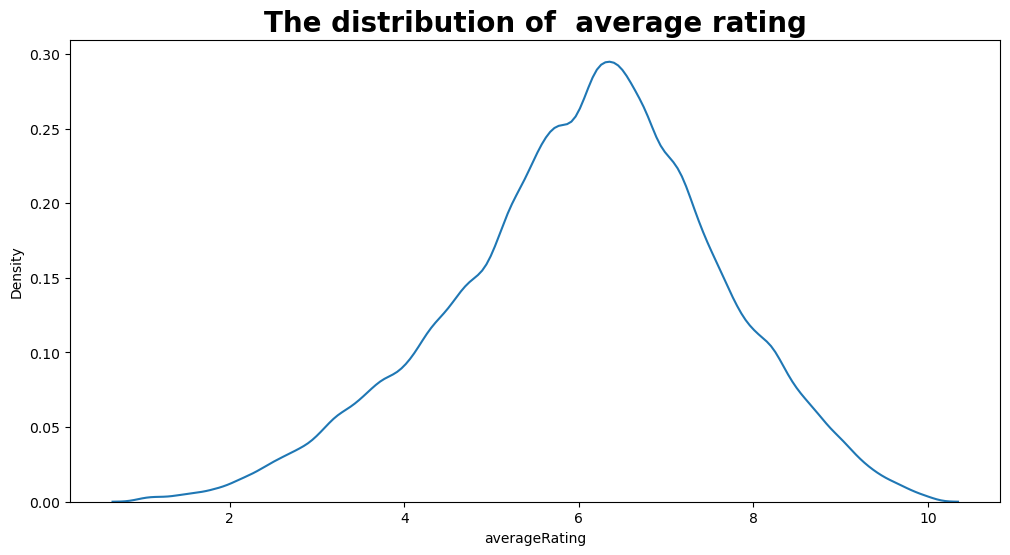

In [5]:
def dis_averageRate(data):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data['averageRating'])
    plt.title('The distribution of  average rating', fontsize=20, weight='bold', color='black')
dis_averageRate(imdb)

Now we know the situation of the average rating which can help us to compare with another factor.

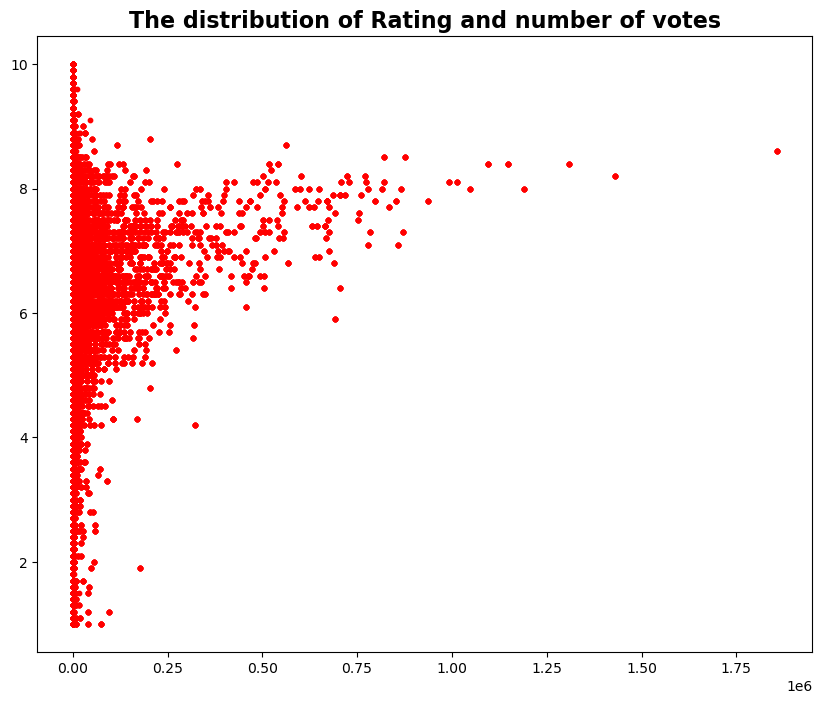

In [6]:
def dis_RateVotes(data):
    plt.figure(figsize=(10, 8))
    plt.scatter(data['numVotes'], data['averageRating'], s=10, c='red')
    plt.title('The distribution of Rating and number of votes', fontsize=16, weight='bold')
    plt.show()
dis_RateVotes(imdb)

This is the relationship between number of votes and rating. And we can see, the scatterplot presents an uncorrelated feature. However, we can observe that a large number of votes occurs around a rating of 8.0. This means that good movies are more likely to receive a large number of ratings. But the number of votes is statistically uncorrelated for ratings. Generally, we can't use number of votes in our machine learning model to predict.

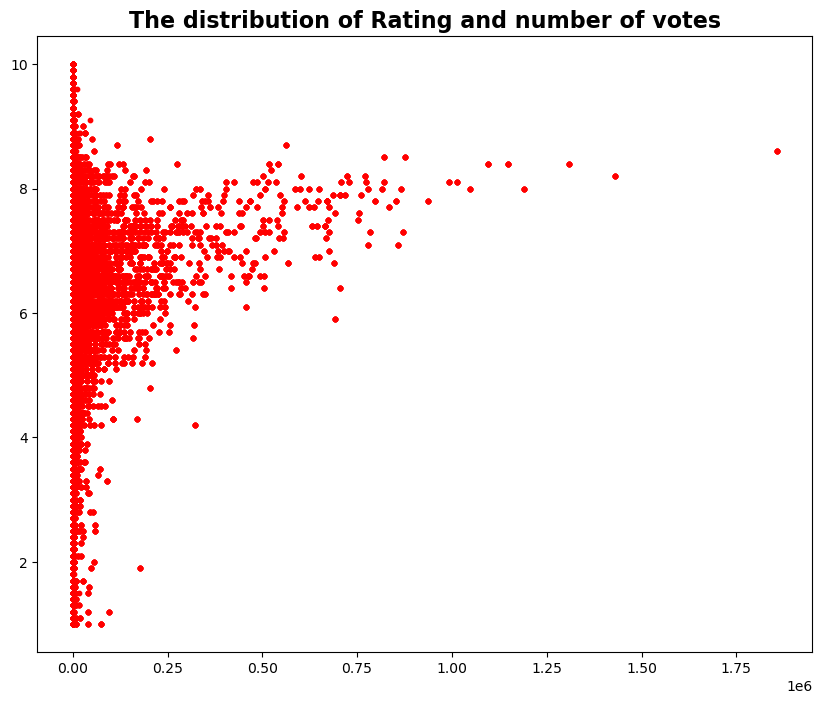

In [7]:
def dis_RateVotes(data):
    plt.figure(figsize=(10, 8))
    plt.scatter(data['numVotes'], data['averageRating'], s=10, c='red')
    plt.title('The distribution of Rating and number of votes', fontsize=16, weight='bold')
    plt.show()
dis_RateVotes(imdb)

In [8]:
imdb.isAdult.describe()

count    404315.000000
mean          0.000893
std           0.029868
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: isAdult, dtype: float64

boxplot shows that whether a movie is adult-rated or not makes big difference in terms of rating. Although not adult movie got higher mean value, the real reason is the tiny volumn of aldult movies(only 404315 times 0.000893 equal to 361). For the sake of rigor, we will not consider this factor in our machine learning models.

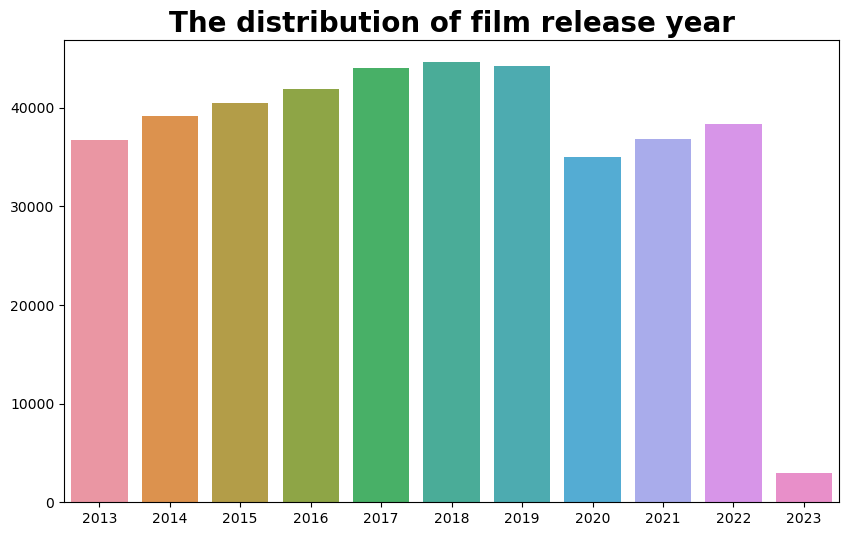

In [9]:
def dis_ReleaseYear(data):
    df = data.startYear.value_counts()
    x = [i for i in df.keys()]
    y = []
    for i in range(0,11):
        y.append(df.values[i])
    plt.figure(figsize=(10, 6))
    plt.title('The distribution of film release year', fontsize=20, weight='bold')
    sns.barplot(x=x, y=y)
dis_ReleaseYear(imdb)

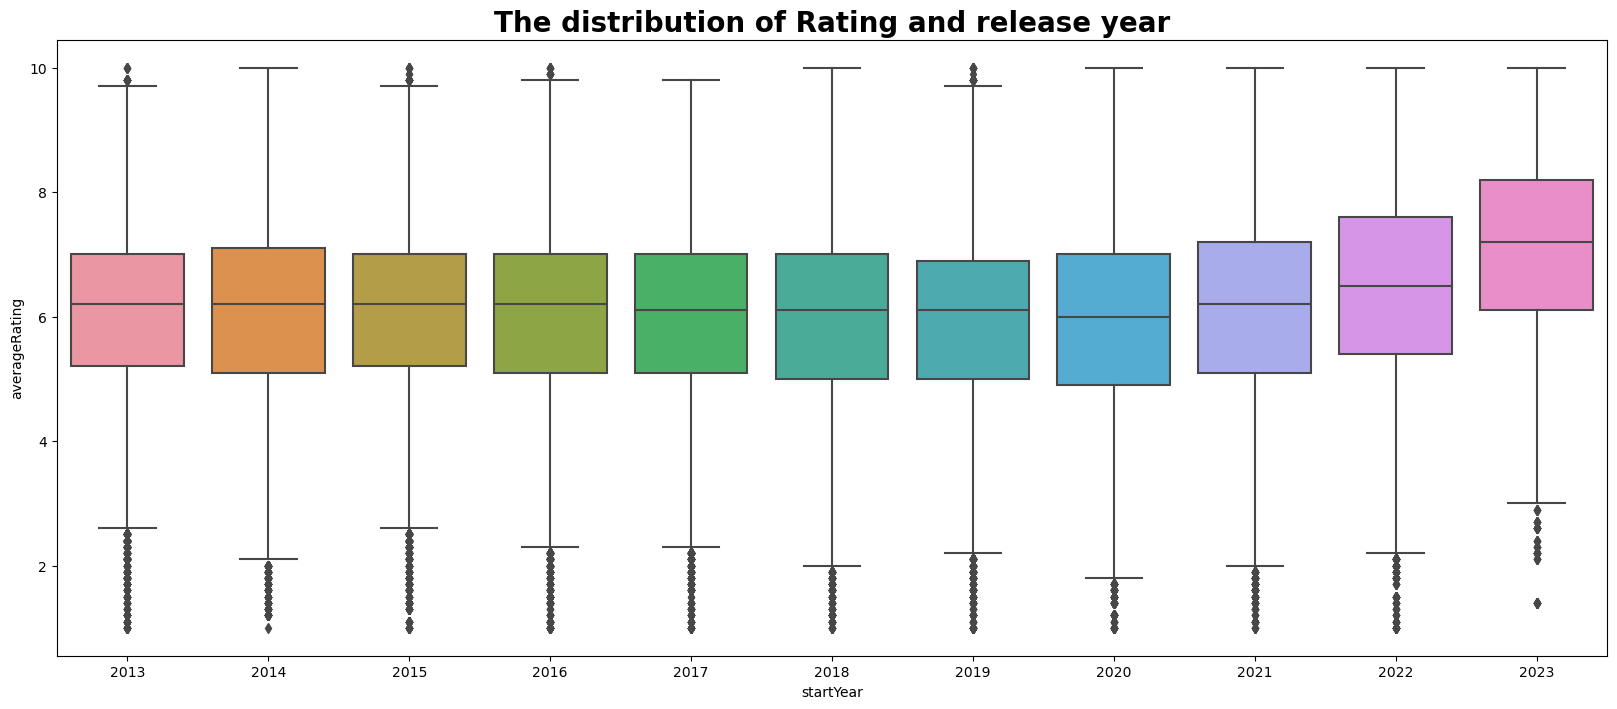

In [10]:
def dis_RateRelease(data):
    plt.figure(figsize=(20, 8))
    sns.boxplot(x="startYear", y="averageRating", data=data, linewidth=1.5)
    plt.title('The distribution of Rating and release year',fontsize=20, weight='bold')
    plt.show()
dis_RateRelease(imdb)

We can see that people generally have better ratings for new movies released after 2021. Despite the huge impact of the pandemic on the movie industry in 2020 resulting in a drop in the number of releases, we still have 35,000 data per year(except 2023) and the rating situation of 2020-2021 is close to 2013-2015(also the number of releasing is close). Only the movies released in 2022 both have enough number of releasing and higher rating. That means the relationship between rating and releasing year is random. So we can't consider this factor in our machine learning models.

Next, we will analysis the relationship between rating and genres. Before visualization, since our data has the relationship of multiple genres for one movie(example under below), we need to separate the different genres in each data.

In [11]:
# multiple genres example
imdb.iloc[[14]]

,Unnamed: 0,tconst,nconst,category,averageRating,numVotes,primaryTitle,isAdult,startYear,runtimeMinutes,genres,primaryName
14,859430,tt0100275,nm0016013,actor,6.5,339,The Wandering Soap Opera,0,2017,80,"Comedy,Drama,Fantasy",Luis Alarcón


Now we will remake a new dataframe as below. We will receive a huge dataframe with 715617 rows.

In [12]:
def Split_genres(data):
    global df1
    df1 = data
    df1 = df1.drop(['genres'], axis=1).join(df1['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
    return df1
Split_genres(imdb)

,Unnamed: 0,tconst,nconst,category,averageRating,numVotes,primaryTitle,isAdult,startYear,runtimeMinutes,primaryName,genres
0,92759,tt0013274,nm0412842,director,6.7,48,Istoriya grazhdanskoy voyny,0,2021,133,Nikolai Izvolov,Documentary
1,92760,tt0013274,nm0895048,director,6.7,48,Istoriya grazhdanskoy voyny,0,2021,133,Dziga Vertov,Documentary
2,522892,tt0062336,nm0815612,actor,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Rubén Sotoconil,Drama
3,522893,tt0062336,nm1860495,actress,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Claudia Paz,Drama
4,522894,tt0062336,nm0016013,actor,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Luis Alarcón,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...
404310,54610727,tt9916730,nm6096005,actor,8.3,10,6 Gunn,0,2017,116,Devadhar Archit,\N
404311,54610728,tt9916730,nm0059461,actor,8.3,10,6 Gunn,0,2017,116,Sunil Barve,\N
404312,54610729,tt9916730,nm13233318,actor,8.3,10,6 Gunn,0,2017,116,Ganesh Vasant Patil,\N
404313,54610730,tt9916730,nm4852679,actor,8.3,10,6 Gunn,0,2017,116,Bhushan Pradhan,\N


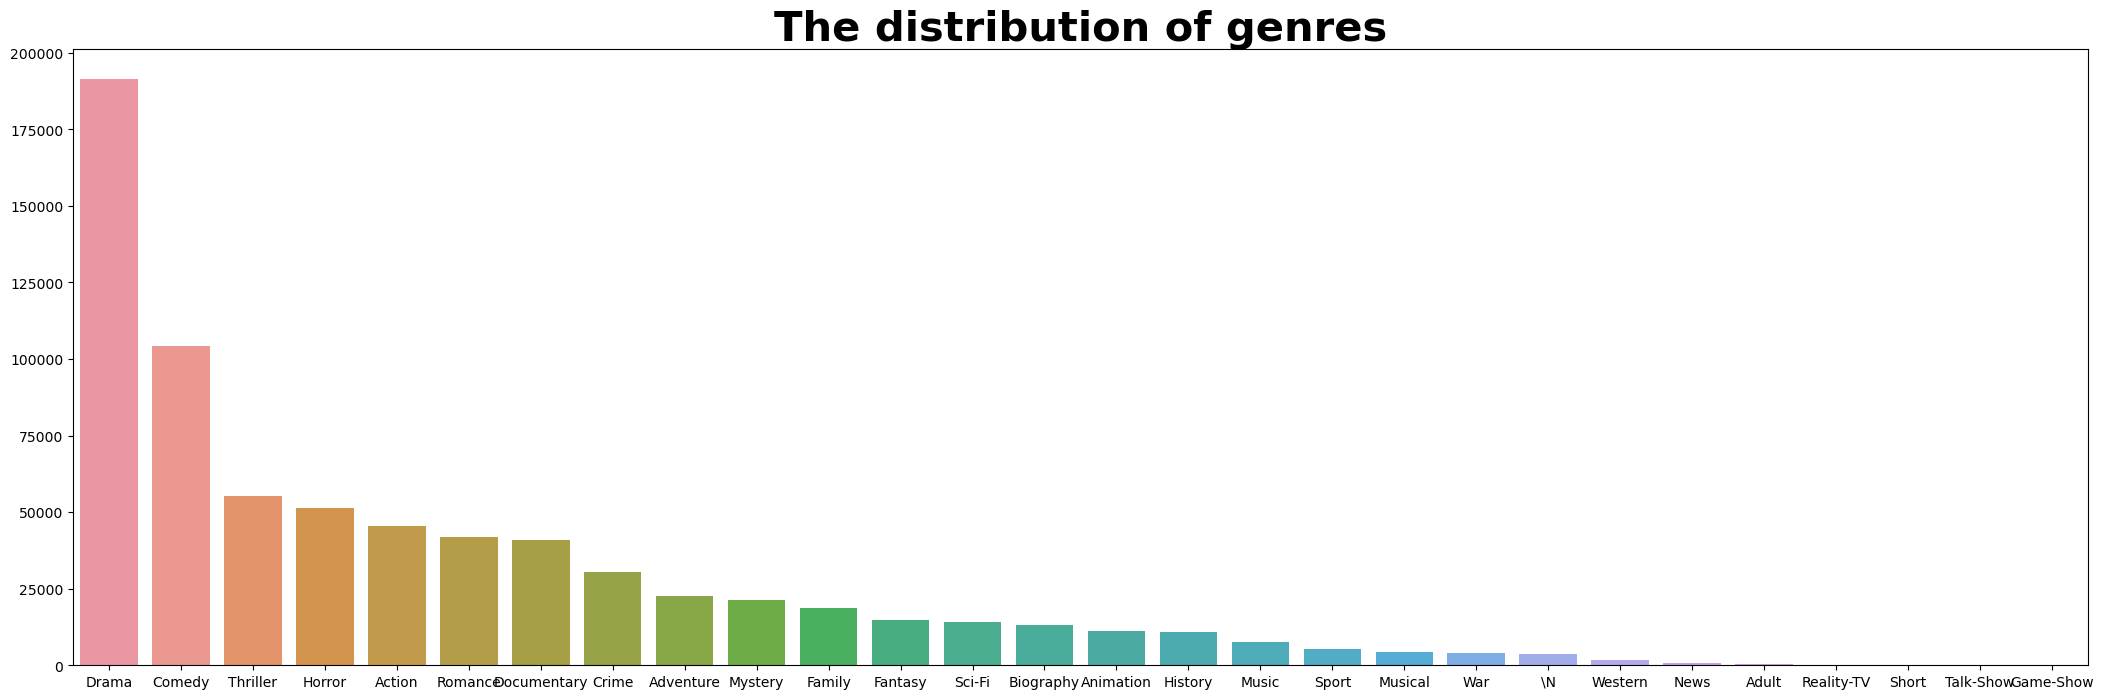

In [13]:
def dis_genres(data):
    df2 = df1.genres.value_counts()
    x = [i for i in df2.keys()]
    y = []
    for i in range(0,28):
        y.append(df2.values[i])
    plt.figure(figsize=(26, 8))
    plt.title('The distribution of genres', fontsize=30, weight='bold')
    sns.barplot(x=x, y=y)
dis_genres(df1)

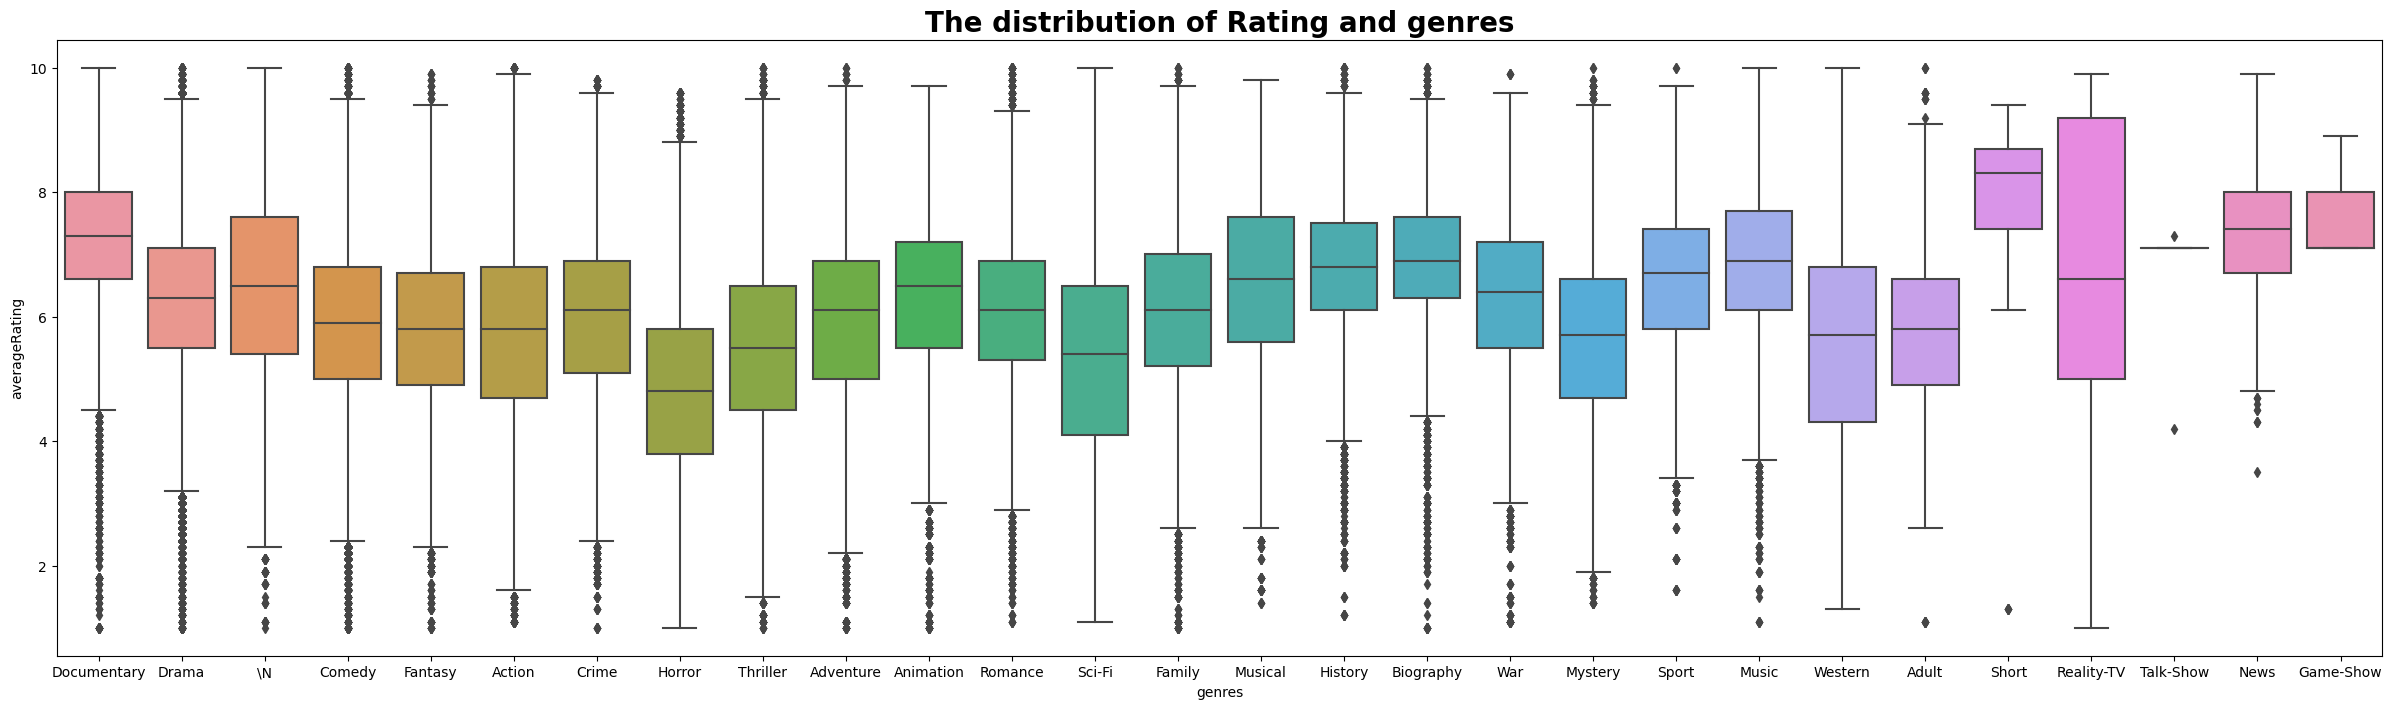

In [14]:
def dis_RateGenre(data):
    plt.figure(figsize=(30, 8))
    sns.boxplot(x="genres", y="averageRating", data=data, linewidth=1.5)
    plt.title('The distribution of Rating and genres',fontsize=20, weight='bold')
    plt.show()
dis_RateGenre(df1)

Here, we can see that Horror, Sci-Fi, Mystery and Western movies are less likely to get high ratings. While Documentary, Drama, Crime, Animation, Musical, History, Biography titles are most likely to get high ratings (except for some genres with too small a sample size). We see the ratings based on genres have specific and different distribution for each genre. So genre is a good factor that we can consider in our machine learning models.

**You can find the above data visualization functions in the <code>modeling.py</code> file in the <code>myProject</code> module.**

Use these functions by execute this line of code:

```python
from myProject import modeling
```

## Part IV: Modeling and Analysis

In [15]:
drop_columns = ["Unnamed: 0", "tconst", "nconst", "category", "primaryTitle", "primaryName"]
df_model = df1.drop(drop_columns, axis=1)

df_model['genres'] = df_model['genres'].replace({r'\N': None})
df_model['runtimeMinutes'] = df_model['runtimeMinutes'].replace({r'\N': None}).astype(float)

df_model = df_model.dropna()

df_model = df_model.reset_index(drop=True)

### Part IV (1): Label Encoder

Label Encoder from the scikit-learn library is about converting **non-numeric data** into **numeric data**. We are specifically transforming the `genres` column of the `df_model` DataFrame into a numeric column. 

This is done to make it easier for machine learning algorithms to process the data.

In [16]:
from sklearn.preprocessing import LabelEncoder

# creating instances of labelencoder
labelencoder = LabelEncoder()

# Assigning numeric values and convert the non-numeric column
df_model['genres'] = labelencoder.fit_transform(df_model['genres'])
df_model.head()

,averageRating,numVotes,isAdult,startYear,runtimeMinutes,genres
0,6.7,48,0,2021,133.0,7
1,6.7,48,0,2021,133.0,7
2,6.4,164,0,2020,70.0,8
3,6.4,164,0,2020,70.0,8
4,6.4,164,0,2020,70.0,8


### Part IV (2): Train-Test Split

In [17]:
y = df_model['averageRating']
x = df_model.drop(['averageRating'], axis = 1)

By splitting the dataset into a training set and a testing set, we can train the model on one subset of the data and evaluate its performance on a completely different subset of the data. This helps to prevent overfitting, which occurs when the model is too complex and fits the training data too closely, resulting in poor performance on new data. 

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

### Part IV (3): Linear Regression and Decision Tree

In [19]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X_train, y_train)
predict_valid = model.predict(X_test)
score = r2_score(y_test,predict_valid)
score

0.017325106775817

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# create a decision tree regressor with max depth of 30
dt_regressor = DecisionTreeRegressor(max_depth=70)

# train the model on the training data
dt_regressor.fit(X_train, y_train)

# make predictions on the test data
y_pred_new = dt_regressor.predict(X_test)

In [21]:
# Compute the R^2 score of the model
score = r2_score(y_test, y_pred_new)
print("R^2 score:", score)

R^2 score: 0.9164228891609977


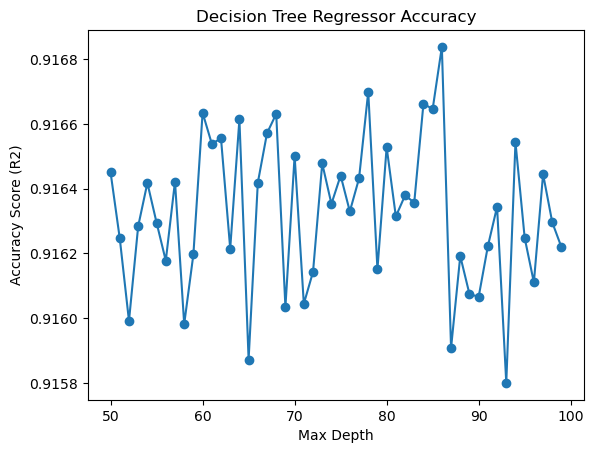

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

depths = range(50, 100)  # try depths from 1 to 20
accuracy_scores = []
for depth in depths:
    # build decision tree regressor with current depth
    clf = DecisionTreeRegressor(max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = r2_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# plot the accuracy graph
plt.plot(depths, accuracy_scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score (R2)')
plt.title('Decision Tree Regressor Accuracy')
plt.show()

We attempted to fit the data using two popular machine learning algorithms, linear regression and decision tree, but found that the accuracy of the resulting models was low. This could be due to various factors such as the complexity of the problem, or the choice of hyperparameters. For decision tree, ghe reason could be that the data may not have clear boundaries or decision boundaries that can be easily separated by a decision tree. In such cases, the decision tree may not be able to capture the underlying patterns in the data and may result in low accuracy.

We tried a dicision tree depth of 70, although the accuarcy of the model seems high, a decision tree with a depth that is too deep can lead to overfitting, poor interpretability, and increased computational costs. It may capture noise or outliers in the training data and have poor generalization to new data, making it less effective in producing accurate predictions. It is important to find an optimal depth for the decision tree to balance accuracy, interpretability, and efficiency.

### Part IV (4): Random Forest

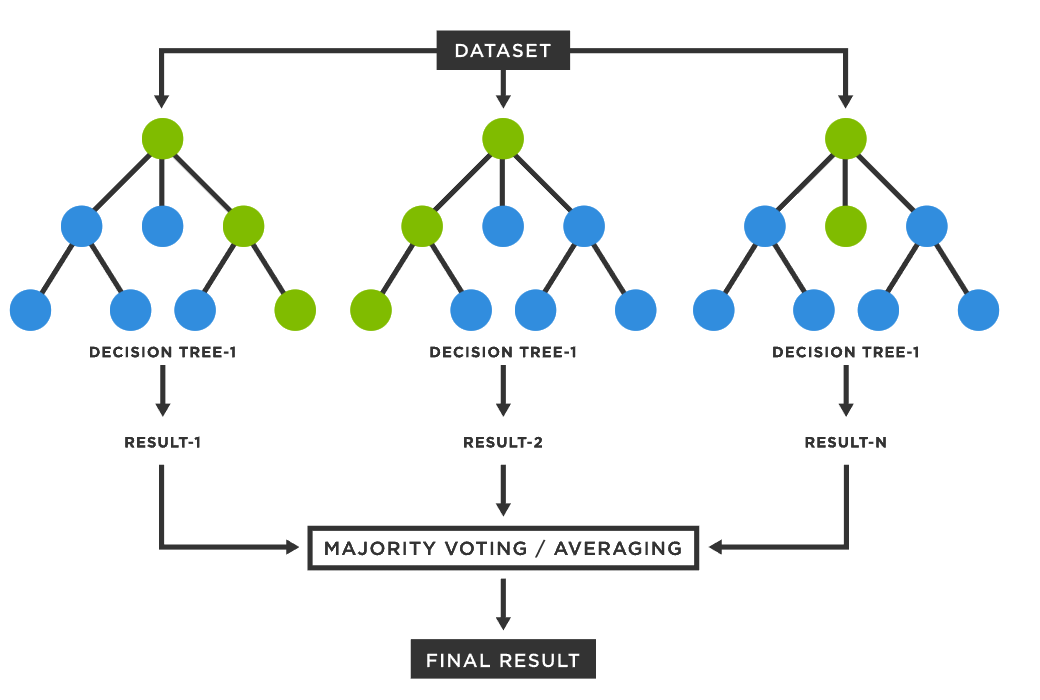

In [23]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.9228830589228495

Random Forest is like a big group of friends trying to decide what to do for the day. Each friend has different ideas, but they all get together and share their suggestions. The group then takes a vote and chooses the most popular option. This way, everyone's opinions are heard, and the decision is made based on the collective knowledge of the group.

Similarly, Random Forest is a group of decision trees, where each tree has its own ideas about how to predict an outcome. The trees are constructed using random subsets of the data and features, which helps to avoid biases and errors that could occur with just one tree. During prediction, each tree makes its own prediction, and the final decision is made based on the majority vote or average of all the predictions. This ensures that the final prediction is more accurate and less biased than just relying on one decision tree.

By using this model, we can make predictions on the rating score of new movies based on their features, such as genre, startyear, and length.

The resulting model has an accuracy of 92%, making it useful for predicting movie ratings.

### Part V: Predict on the new test data

In [24]:
# data preposessing
test_imdb = pd.read_csv('test_imdb.csv')
test_imdb = test_imdb.drop(['genres'], axis=1).join(test_imdb['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
test = test_imdb.drop(drop_columns, axis=1)

test['genres'] = test['genres'].replace({r'\N': None})
test['runtimeMinutes'] = test['runtimeMinutes'].replace({r'\N': None}).astype(float)
test = test.dropna()
test = test.reset_index(drop=True)

test['genres'] = labelencoder.transform(test['genres'])
y_newtest = test['averageRating']
X_newtest = test.drop(['averageRating'], axis = 1)

In [25]:
regr.score(X_newtest, y_newtest)

-0.060091572808959715

The `regr.score()` calculate the coefficient of determination R^2 of the predicted values compared to the actual values. It is a statistical measure that indicates how well the regression model fits the actual data. The score can range from negative infinity to 1. A score of 1 indicates a perfect fit, while a score of 0 indicates that the model always predicts the mean of the target variable. A negative score indicates that the model is worse than predicting the mean. In this case, since the score is negative, it means that the model performs worse than just predicting the mean of the target variable, which suggests that the model is not accurate in predicting new data.

### Part VI: Neural Network* (further try)

We implemented an OneLayerNetwork and an TwoLayerNetwork from scratch. They are defined in <code>nn.py</code> in the <code>myProject</code> module. To use the neural network, we want to implement a Standard Scaler to the numeric features to improve the accuracy. We do this by using the <code>Pipeline</code> module.

In [26]:
from myProject import nn

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split

# Pipeline
numerical_features = list(X_train)

# construct a pipeline and scale the numeric features
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features)
    ])

X_prepared_train = full_pipeline.fit_transform(X_train)

# Pipeline the test data
X_prepared_test = full_pipeline.transform(X_test)

In [28]:
# split the training sets into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_prepared_train, y_train, test_size=0.15, random_state=42)
X_test = X_prepared_test

In [29]:
# fix random seed
import torch
np.random.seed(42)
torch.manual_seed(42)

In [30]:
# Then we create dataloaders for the neural network
# Data Preparation

train_batch_size = 16
test_batch_size = 32

## Load data
X_train, y_train, X_val, y_val, X_test, y_test = nn.create_data(X_train, y_train, X_val, y_val, X_test, y_test)

## Create data loaders
train_loader, val_loader, test_loader = nn.get_dataloaders(X_train, y_train, X_val, y_val, 
                                                        X_test, y_test, train_batch_size=train_batch_size, 
                                                        test_batch_size=test_batch_size)

If you implement these codes:

```python
## Define hyperparameters
lr = 0.001
num_epochs = 20

## Init models
oneLayerNN, criterion, optimizer = init_oneLayerNN(X_train.shape[1], lr=lr)
results_one = train(oneLayerNN, criterion, optimizer, train_loader, val_loader, num_epochs=num_epochs)
```

You might get:

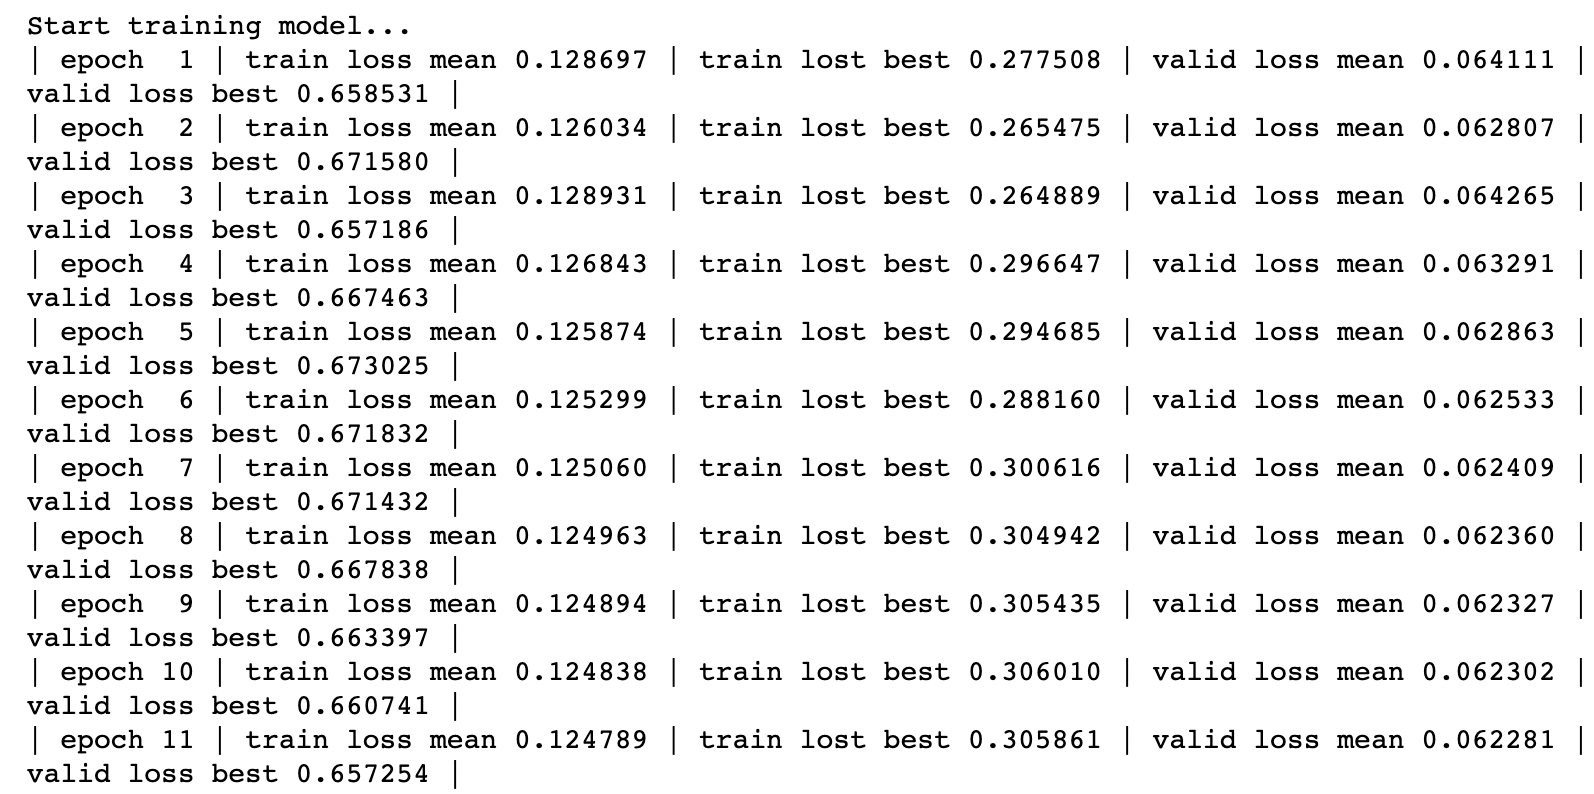

Then, when I implemented the two models:
```python
test_acc_oneLayer = evaluate_loss(oneLayerNN, torch.nn.MSELoss(), test_loader)
test_acc_twoLayer = evaluate_loss(twoLayerNN, torch.nn.MSELoss(), test_loader)

print("Test loss mean for OneLayerNetwork: ", test_acc_oneLayer)
print("Test loss mean for TwoLayerNetwork: ", test_acc_twoLayer)
```

I got the accuracies as:

    Test loss mean for OneLayerNetwork:  0.06895994353409356
    Test loss mean for TwoLayerNetwork:  0.062321129022988996

### Conclusion and Possible Reasons for low prediction Accuracy

Based on our experience working on this project, we believe there are several possible reasons why our model's accuracy is low. One reason is the nature of the movie industry itself - predicting the success of a movie is not a straightforward task, and there are many factors that can influence the performance of a film, including marketing, timing of release, and competition in the market. Another reason could be the quality of our data - despite our efforts to clean and preprocess the data, there may still be underlying issues that are impacting the accuracy of our model.

Additionally, we may not have been able to capture all relevant features that contribute to movie success in our dataset. It's possible that other factors, such as the quality of the script or the reputation of the director, are not included in our model and therefore not being accounted for in our predictions. Finally, it's also possible that we did not choose the best model for our dataset, and other models could have potentially yielded higher accuracy.

Overall, while it is disappointing that we were not able to meet our initial goal of accurately predicting movie performance, I believe this project was a valuable learning experience in working with real-world data and implementing machine learning techniques. We were able to gain hands-on experience in data preprocessing, feature engineering, and model selection, which will be useful skills in future data science projects.